In [7]:
import os
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


In [26]:
mass_points = [300, 400, 500, 550, 600, 700]  # Example mass points
# y_values = [ 60, 70, 80, 90, 100, 125, 150]  # Example Y values
y_values = [ 60]  # Example Y values


# Load signal data from Parquet files
signal_data = []
for mass in mass_points:
    for y in y_values:
        file_path = f"../../../output_parquet/final_production_Syst/merged/NMSSM_X{mass}_Y{y}/nominal/NOTAG_merged.parquet"
        
        if os.path.exists(file_path):  # Check if file exists
            try:
                df = pd.read_parquet(file_path)  # Load the Parquet file
                df["mass"] = mass  
                df["y_value"] = y  # Store Y value if needed
                df["label"] = 1  # Assuming signal label
                signal_data.append(df)
            except Exception as e:
                print(f"Warning: Could not read {file_path}. Error: {e}")
        else:
            print(f"Warning: File {file_path} does not exist.")

# Combine all signal data into a single DataFrame
signal_df = pd.concat(signal_data, ignore_index=True) if signal_data else pd.DataFrame()

In [33]:
# Define features and labels
features = [
    'Res_HHbbggCandidate_mass']

In [34]:
print(signal_df.columns.tolist())


['lead_seediEtaOriX', 'lead_cutBased', 'lead_electronVeto', 'lead_hasConversionTracks', 'lead_isScEtaEB', 'lead_isScEtaEE', 'lead_mvaID_WP80', 'lead_mvaID_WP90', 'lead_pixelSeed', 'lead_seedGain', 'lead_electronIdx', 'lead_jetIdx', 'lead_seediPhiOriY', 'lead_vidNestedWPBitmap', 'lead_energyRaw', 'lead_eta', 'lead_haloTaggerMVAVal', 'lead_hoe_PUcorr', 'lead_pfChargedIsoPFPV', 'lead_pfPhoIso03', 'lead_pfRelIso03_all_quadratic', 'lead_pfRelIso03_chg_quadratic', 'lead_phi', 'lead_sipip', 'lead_x_calo', 'lead_y_calo', 'lead_z_calo', 'lead_genPartFlav', 'lead_genPartIdx', 'lead_electronIdxG', 'lead_genPartIdxG', 'lead_jetIdxG', 'lead_ScEta', 'lead_vetoEELeak', 'lead_pt', 'lead_rho_smear', 'lead_mvaID_run3', 'lead_mvaID_nano', 'lead_raw_r9', 'lead_r9', 'lead_raw_sieie', 'lead_sieie', 'lead_raw_etaWidth', 'lead_etaWidth', 'lead_raw_phiWidth', 'lead_phiWidth', 'lead_raw_sieip', 'lead_sieip', 'lead_raw_s4', 'lead_s4', 'lead_raw_hoe', 'lead_hoe', 'lead_raw_ecalPFClusterIso', 'lead_ecalPFClusterIs

In [35]:
bbgg_pt= signal_df[features]

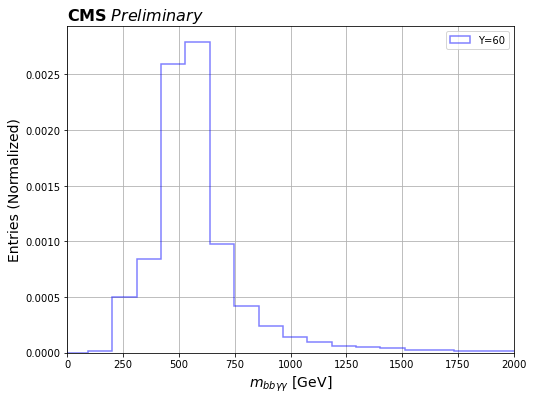

In [40]:
# Check if data is available
if not signal_df.empty and "Res_HHbbggCandidate_mass" in signal_df.columns:
    plt.figure(figsize=(8, 6))

    # Define color palette
    colors = ["blue", "orange", "brown", "black", "purple", "gray", "red"]
    
    for i, y in enumerate(y_values):
        subset = signal_df[signal_df["y_value"] == y]
        if not subset.empty:
            plt.hist(subset["Res_HHbbggCandidate_mass"], bins=50, histtype='step', alpha = 0.5,
                     density=True, label=f"Y={y}", linewidth=1.5, color=colors[i % len(colors)])

    # Plot formatting
    plt.xlabel(r"$m_{bb\gamma\gamma}$ [GeV]", fontsize=14)
    plt.ylabel("Entries (Normalized)", fontsize=14)
    plt.title(r"$\bf{CMS} \hspace{0.3} \mathit{Preliminary}$", loc='left', fontsize=16)
    plt.xlim(0, 2000)
    plt.legend()
    plt.grid()
    plt.show()

else:
    print("No data available or column 'Res_HHbbggCandidate_pt' not found.")

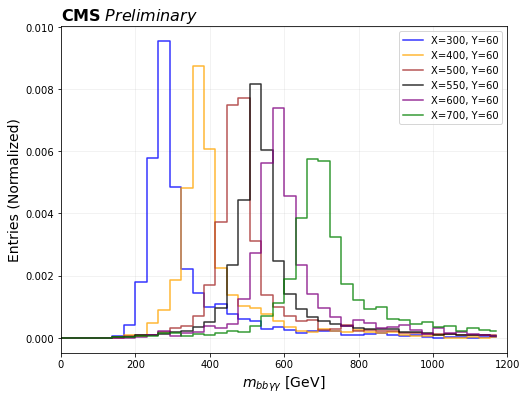

        count        mean         std    min         25%         50%  \
mass                                                                   
300    1816.0  352.681792  182.341314 -999.0  277.177349  303.719645   
400    1579.0  449.735752  205.797539 -999.0  369.194548  398.764437   
500    4971.0  540.198538  276.986900 -999.0  466.049191  498.837792   
550   11105.0  564.361997  344.996130 -999.0  514.914012  549.660174   
600    1310.0  567.057512  447.937719 -999.0  562.246449  602.309580   
700    2637.0  551.441512  645.841359 -999.0  638.784149  706.270922   

             75%          max  
mass                           
300   364.374103  2251.755922  
400   449.343310  2106.583649  
500   545.554656  3362.314052  
550   597.774982  4360.528573  
600   663.364205  3046.260537  
700   778.889139  4459.720069  


In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define mass and Y values
mass_points = [300, 400, 500, 550, 600, 700]  # X values
y_values = [60]  # Fixed Y value

# Load signal data from Parquet files
signal_data = []
for mass in mass_points:
    for y in y_values:
        file_path = f"../../../output_parquet/final_production_Syst/merged/NMSSM_X{mass}_Y{y}/nominal/NOTAG_merged.parquet"
        
        if os.path.exists(file_path):  # Check if file exists
            try:
                df = pd.read_parquet(file_path)  # Load Parquet file
                df["mass"] = mass  
                df["y_value"] = y  # Store Y value
                df["label"] = 1  # Assuming signal label
                signal_data.append(df)
            except Exception as e:
                print(f"Warning: Could not read {file_path}. Error: {e}")
        else:
            print(f"Warning: File {file_path} does not exist.")

# Combine all signal data into a single DataFrame
signal_df = pd.concat(signal_data, ignore_index=True) if signal_data else pd.DataFrame()

# Define the mass variable to plot
feature = 'Res_HHbbggCandidate_mass'

# Check if data is available
if not signal_df.empty and feature in signal_df.columns:
    plt.figure(figsize=(8, 6))

    # Define color palette
    colors = ["blue", "orange", "brown", "black", "purple", "green", "red"]
    
    # Define bin edges for better visualization
    bins = np.linspace(0, 1200, 40)  # From 0 to 800 with 40 bins

    for i, mass in enumerate(mass_points):
        subset = signal_df[signal_df["mass"] == mass]
        if not subset.empty:
            hist_values, bin_edges = np.histogram(subset[feature], bins=bins, density=True)
            plt.step(bin_edges[:-1], hist_values, where="mid", alpha=0.8, 
                     linewidth=1.5, color=colors[i % len(colors)], label=f"X={mass}, Y={y_values[0]}")

    # Plot formatting
    plt.xlabel(r"$m_{bb\gamma\gamma}$ [GeV]", fontsize=14)
    plt.ylabel("Entries (Normalized)", fontsize=14)
    plt.title(r"$\bf{CMS} \hspace{0.3} \mathit{Preliminary}$" , loc='left', fontsize=16)
    plt.xlim(0, 1200)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.savefig("kinematics_Y60.pdf")
    plt.show()

    # Print summary stats for debugging
    print(signal_df.groupby("mass")[feature].describe())

else:
    print(f"No data available or column '{feature}' not found.")
